In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
%matplotlib inline

In [32]:
CAvideos = pd.read_csv('Trending Youtube Video Statistics\CAvideos.csv')
DEvideos = pd.read_csv('Trending Youtube Video Statistics\DEvideos.csv')
FRvideos = pd.read_csv('Trending Youtube Video Statistics\FRvideos.csv')
GBvideos = pd.read_csv('Trending Youtube Video Statistics\GBvideos.csv')
INvideos = pd.read_csv('Trending Youtube Video Statistics\INvideos.csv')
JPvideos = pd.read_csv('Trending Youtube Video Statistics\JPvideos.csv', encoding='latin-1')
KRvideos = pd.read_csv('Trending Youtube Video Statistics\KRvideos.csv', encoding='latin-1')
MXvideos = pd.read_csv('Trending Youtube Video Statistics\MXvideos.csv', encoding='latin-1')
RUvideos = pd.read_csv('Trending Youtube Video Statistics\RUvideos.csv', encoding='latin-1')
USvideos = pd.read_csv('Trending Youtube Video Statistics\\USvideos.csv', encoding='latin-1')

In [3]:
CAvideos['Country'] = 'Canada'
DEvideos['Country'] = 'Germany'
FRvideos['Country'] = 'France'
GBvideos['Country'] = 'United Kingdom'
INvideos['Country'] = 'India'
JPvideos['Country'] = 'Japan'
KRvideos['Country'] = 'Korea'
MXvideos['Country'] = 'Mexico'
RUvideos['Country'] = 'Russia'
USvideos['Country'] = 'Unites States'

In [4]:
CAvideos.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Canada
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Canada
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Canada
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,Canada
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Canada
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Canada
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,Canada
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,Canada


In [5]:
CAvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
Country                   object
dtype: object

In [6]:
ALL_videos = [CAvideos,DEvideos,FRvideos,GBvideos,INvideos,JPvideos,KRvideos,MXvideos,RUvideos,USvideos]
ALL_videos = pd.concat(ALL_videos)

In [7]:
ALL_videos.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
18620,0QOPb9DlOfY,18.17.02,Brain Games for Old Dogs Could Improve Their M...,National Geographic,15,2018-02-15T13:00:00.000Z,"national geographic|""nat geo""|""natgeo""|""animal...",87000,1700,83,169,https://i.ytimg.com/vi/0QOPb9DlOfY/default.jpg,False,False,False,Scientists are testing if they can improve cog...,Unites States
28801,OuTM9ClTs48,18.28.04,Nandini | 26 Apr 2018 | SunTV,SunTV Tamil,22,2018-04-27T06:02:17.000Z,"SunTV|""SunTvTamizh""|""Tamil Channel""|""Nandini""|...",437836,2052,303,167,https://i.ytimg.com/vi/OuTM9ClTs48/default.jpg,False,False,False,To Watch SATHYA Full Movie Click 👉 http://bit...,India
21775,45Nkhoa72gY,18.15.03,Tiger Policewala (2018) Telugu Film Dubbed Int...,Goldmines Premiere,1,2018-03-12T16:30:01.000Z,"Goldmines Premiere|""Tiger Policewala Hindi Dub...",2795386,9551,2284,0,https://i.ytimg.com/vi/45Nkhoa72gY/default.jpg,True,False,False,The movie story deals with Daya is an orphan w...,India
3746,aU43yBZDimI,17.02.12,Ð Ð°Ð·Ð²ÐµÐ´Ð¾Ð¿ÑÐ¾Ñ: ÐÐ»Ð¸Ð¼ ÐÑÐºÐ¾Ð² Ð¾...,Dmitry Puchkov,1,2017-12-01T06:01:37.000Z,"goblin|""Ð³Ð¾Ð±Ð»Ð¸Ð½""|""Ð´Ð¼Ð¸ÑÑÐ¸Ð¹ Ð¿ÑÑÐº...",154392,7537,305,1148,https://i.ytimg.com/vi/aU43yBZDimI/default.jpg,False,False,False,ÐÐ´ÑÑÑ Ð½Ð¾Ð²ÑÑ Ð»ÐµÐºÑÐ¸Ð¹ ÐÐ»Ð¸Ð¼Ð° ...,Russia
8325,WWSEmHm27ac,17.25.12,What Just Happened Over LA? We Got It! 12/22/17,thirdphaseofmoon,28,2017-12-23T02:13:37.000Z,"UFO|""UFOS""|""alien""|""moonlandings""|""craft""|""shi...",624648,6296,1206,5134,https://i.ytimg.com/vi/WWSEmHm27ac/default.jpg,False,False,False,Something Very Strange Just Happened Over Our ...,Canada
37093,deCH6JEIXC8,18.27.05,كاميرا كاشي رانا حكمناك مسكينة هبلوها و بكّاوه...,Dzair Now,22,2018-05-26T19:59:22.000Z,"DzairNow|""dzair""|""new""|""now""|""رمضان""|""2018""|""r...",97054,673,75,196,https://i.ytimg.com/vi/deCH6JEIXC8/default.jpg,False,False,False,NaN,France
5458,KLT6MwxhBFo,17.11.12,MANCHESTER UNITED 1 VS 2 MANCHESTER CITY FULL ...,SPS Proudly Present,22,2017-12-10T20:47:24.000Z,[none],597378,2171,215,501,https://i.ytimg.com/vi/KLT6MwxhBFo/default.jpg,False,False,False,NaN,Mexico
17883,5Z4gDyTa5Cg,18.13.02,[AMA SUPERCROSS 2018] Etape 06: San Diego (int...,AB Moteurs,2,2018-02-12T11:53:49.000Z,"AB Moteurs""|""AB Moteur""|""course""|""rallye""|""cir...",4494,152,8,12,https://i.ytimg.com/vi/5Z4gDyTa5Cg/default.jpg,False,False,False,Après le départ à la retraite du « Roi » du SX...,France
31003,3gX7oEduW0Y,18.25.05,[ë³í¬ì¬ì ìì¬í­ê²©] í¼íì´ì¤ ì´ë...,ë¯¸ëì´ìì¹TV,25,2018-05-23T10:38:37.000Z,"í¼íì´ì¤|""ì´ë""|""íµì¬ì°°""|""ì¸ê¶""|""ì¤...",42255,2952,42,273,https://i.ytimg.com/vi/3gX7oEduW0Y/default.jpg,False,False,False,"í¼íì´ì¤ ì´ëì ë¬´ì í íµì¬ì°°ê³¼,...",Korea
26098,UwvKCEv-cok,18.14.04,Mazhya Navryachi Bayko - राधिका खडसावणार चित्र...,Manoranjan Marathi,24,2018-04-13T08:31:02.000Z,"mazhya navryachi bayko|""majhya navryachi bayko...",142535,278,70,8,https://i.ytimg.com/vi/UwvKCEv-cok/default.jpg,False,False,False,"In Zee Marathi's 'Mazhya Navryachi Bayko', Chi...",India


In [8]:
ALL_videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
Country                   object
dtype: object

In [9]:
ALL_videos = ALL_videos.replace({'category_id':{1:'Film & Animation',2:'Autos & Vehicles',10:'Music',15:'Pets & Animals',17:'Sports',18:'Short Movies',19:'Travel & Events',20:'Gaming',21:'Videoblogging',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'Howto & Style',27:'Education',28:'Science & Technology',29:'Nonprofits & Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',39:'Horror',40:'Sci-Fi/Fantasy',41:'Thriller',42:'Shorts',43:'Shows',44:'Trailers'}})

In [21]:
print(round(ALL_videos['views'].mean(),2)/10000000)

1.32656826


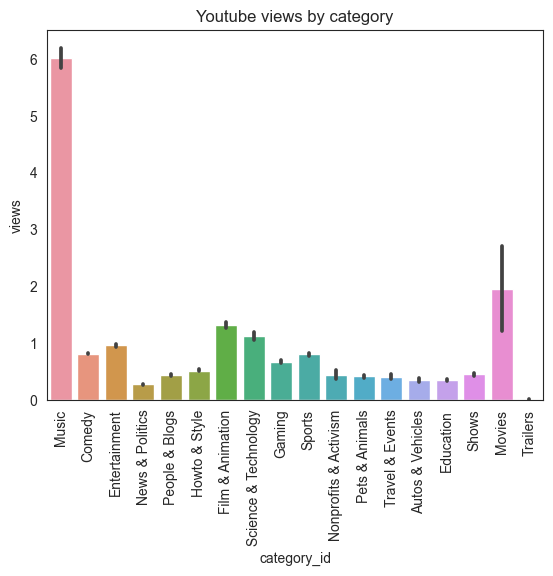

In [28]:
sns.set_palette("RdBu")
sns.set_style('white')
sns.barplot(data = ALL_videos, x = 'category_id', y = round(ALL_videos['views'],2)/1000000)
plt.xticks(rotation = 90)
plt.title("Youtube views by category")
plt.show()

In [29]:
print(ALL_videos['views'].sum())

498712723535


In [11]:
ALL_videos.sample(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
17953,5lgxy7qYx2E,18.20.02,11 Weird Things To Do When You Are Bored / Fun...,Troom Troom,Howto & Style,2018-02-18T15:00:01.000Z,"what to do when bored|""what to do when you are...",1227473,18384,1353,2305,https://i.ytimg.com/vi/5lgxy7qYx2E/default.jpg,False,False,False,Subscribe Here: http://bit.ly/2uaz0on\n10 Easy...,India
5173,FyBSexETvro,17.09.12,THE GREATEST FOOTBALL TEAM IN THE WORLD!,miniminter,Gaming,2017-12-08T20:04:39.000Z,"miniminter|""mm7games""|""simon""|""random""|""footba...",552964,29134,198,1334,https://i.ytimg.com/vi/FyBSexETvro/default.jpg,False,False,False,Discount code: MINISKYSTALKER10.\nBUY PREDATOR...,Canada
34569,u2FeS9CYa7o,18.14.05,ÐÑÐ°Ð»ÑÑÐ½ÑÑ ÐÐÐ£Ð¢ Ð Ð ÐÐ¡Ð¡ÐÐ®! Ð...,ÐÑÐ°Ð»ÑÑÐ½ÑÑ by Kuzno Productions,Entertainment,2018-05-13T17:10:03.000Z,#kuzno #Ð¸ÑÐ°Ð»ÑÑÐ½ÑÑ # ÐºÑÑÐ½Ð¾ #Ð¸ÑÐ...,76682,5881,119,334,https://i.ytimg.com/vi/u2FeS9CYa7o/default.jpg,False,False,False,ÐÐÐÐÐ¢Ð¬ ÐÐÐÐ ÐÐ¡ Ð ÐÐÐÐÐÐ ÐÐÐ...,Russia
20402,u3YdNtZuSs8,18.17.03,ê¹ì´ì¤ì ë´ì¤ê³µì¥ 3ì 16ì¼ (ê¸) ì ...,ë´ì¤ êµ¬ë,News & Politics,2018-03-16T00:17:08.000Z,"ê¹ì´ì¤ì ë´ì¤ê³µì¥|""ê¹ì´ì¤ë´ì¤ê³µì...",35207,491,64,146,https://i.ytimg.com/vi/u3YdNtZuSs8/default.jpg,False,False,False,"ì¢ìì, êµ¬ë , ê³µì ë¶íí´ì:) ê¹ì...",Korea
1479,hziHYKyZEBU,17.21.11,Theeran Adhigaaram Ondru Review - Karthi - V...,Tamil Talkies,Entertainment,2017-11-17T18:25:07.000Z,"Tamil Cinema (Film Genre)|""Review""|""Tamil movi...",437162,5838,5341,1746,https://i.ytimg.com/vi/hziHYKyZEBU/default.jpg,False,False,False,Watch the most expected review of Karthi starr...,India
34031,GpxCT36DxKg,18.27.05,MOWGLI - Official 1st Trailer,Warner Bros. Pictures,Entertainment,2018-05-21T18:00:16.000Z,"Mowgli|""Jungle Book""|""Rudyard Kipling""|""Christ...",13103833,117417,10264,17218,https://i.ytimg.com/vi/GpxCT36DxKg/default.jpg,False,False,False,Watch the new trailer for #Mowgli starring Chr...,India
39516,Q5KmA3Xbmqo,18.07.06,The Spider and The Butterfly - Animated Short,Dragonfoxgirl,Entertainment,2018-05-15T05:06:07.000Z,"animation|""thesis film""|""dragonfoxgirl""|""anima...",7412246,339623,5601,45049,https://i.ytimg.com/vi/Q5KmA3Xbmqo/default.jpg,False,False,False,A little white spider spends her days daydream...,Unites States
33366,hSXprL3dThE,18.23.05,ભણેલો ખજૂર -Jigli Khajur New Comedy Video-guja...,Ram Audio,Comedy,2018-05-22T04:00:07.000Z,"ભણેલો ખજૂર|""Jigli Khajur New Comedy Video""|""Bh...",327235,5663,348,123,https://i.ytimg.com/vi/hSXprL3dThE/default.jpg,False,False,False,#Episode-3#VandhoNew Latest gujarati Comedy We...,India
635,Ax1P5Q8Kr9g,17.17.11,"Huge IGN Failure Exposed, Why Zoella Is Being ...",Philip DeFranco,Entertainment,2017-11-14T22:35:58.000Z,"IGN|""Kotaku""|""Kallie Plagge""|""Vince Ingenito""|...",1577533,67286,2451,12571,https://i.ytimg.com/vi/Ax1P5Q8Kr9g/default.jpg,False,False,False,"Grab 'ARTEMIS' or any other title, for FREE an...",Canada
23272,TBikbn5XJhg,18.12.03,TIMELAPSE OF THE ENTIRE UNIVERSE,melodysheep,Music,2018-03-10T01:15:54.000Z,"timelapse|""entire""|""universe""|""billion""|""years...",484995,10428,173,668,https://i.ytimg.com/vi/TBikbn5XJhg/default.jpg,False,False,False,"On a cosmic time scale, human history is as br...",Russia


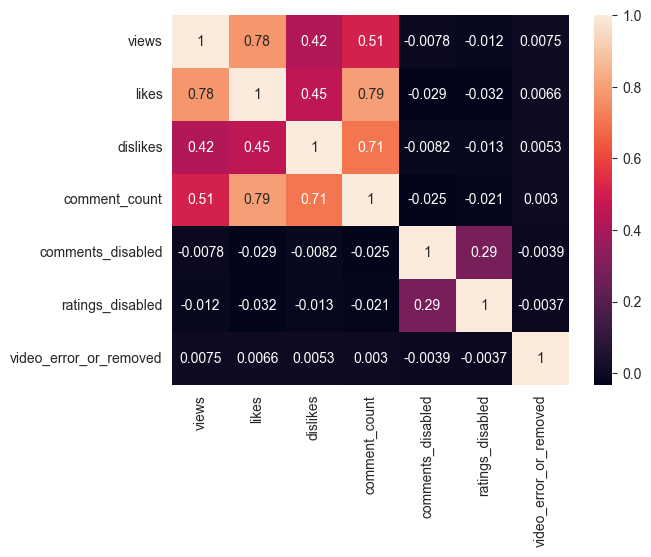

In [34]:
sns.heatmap(ALL_videos.corr(),annot=True);